In [1]:
import numpy as np 
import pandas as pd 
import re # this is the regular expression library which helps us manipulate text (strings) fairly easily and intuitively
import nltk # this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics
import matplotlib.pyplot as plt
import string # this is used for string manipulations
import matplotlib
from nltk.stem.snowball import SnowballStemmer
import json
import re
import string

from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# import nltk
# nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
Roosevelt = inaugural.raw('1941-Roosevelt.txt')
Kennedy = inaugural.raw('1961-Kennedy.txt')
Nixon = inaugural.raw('1973-Nixon.txt')

## Problem 2:

**In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:**

#### President Franklin D. Roosevelt in 1941
#### President John F. Kennedy in 1961
#### President Richard Nixon in 1973

In [3]:
speech = pd.read_excel("Project_Speech.xlsx")

**Sample of the Dataset:**

In [4]:
speech.head()

,Name,Speech
0,Roosevelt,On each national day of inauguration since 178...
1,Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
2,Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


In [5]:
speech.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    3 non-null      object
 1   Speech  3 non-null      object
dtypes: object(2)
memory usage: 176.0+ bytes


## 2.1 Find the number of characters, words, and sentences for the mentioned documents. – 3 Marks

**Find the number of characters, words and sentences for the mentioned documents. (Hint: use .words(), .raw(), .sent() for extracting counts)**

**Count of Characters- including spaces**

* counting the total number of characters in each file separately.

In [6]:
speech['char_count'] = speech['Speech'].str.len()
speech.head()

,Name,Speech,char_count
0,Roosevelt,On each national day of inauguration since 178...,7651
1,Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7673
2,Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",10106


**Count of Characters- without spaces**

**Using raw() function**

In [7]:
# len1 = len(inaugural.raw('1941-Roosevelt.txt'))
print("Count of Characters in Roosevelt speech: ",len(inaugural.raw('1941-Roosevelt.txt')))
print("Count of Characters in Kennedy speech: ",len(inaugural.raw('1961-Kennedy.txt')))
print("Count of Characters in Nixon speech: ",len(inaugural.raw('1973-Nixon.txt')))

Count of Characters in Roosevelt speech:  7571
Count of Characters in Kennedy speech:  7618
Count of Characters in Nixon speech:  9991


**Count of Number of words:**

In [8]:
speech['word_count'] = speech['Speech'].apply(lambda x: len(str(x).split(" ")))
speech.head()

,Name,Speech,char_count,word_count
0,Roosevelt,On each national day of inauguration since 178...,7651,1323
1,Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7673,1364
2,Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",10106,1769


**Count Number of Sentence:**

**Using .sents() function**

In [9]:
print("Number of Sentence in Roosevelt Speech: ",len(inaugural.sents('1941-Roosevelt.txt')))
print("Number of Sentence in Kennedy Speech: ",len(inaugural.sents('1961-Kennedy.txt')))
print("Number of Sentence in Nixon Speech: ",len(inaugural.sents('1973-Nixon.txt')))

Number of Sentence in Roosevelt Speech:  68
Number of Sentence in Kennedy Speech:  52
Number of Sentence in Nixon Speech:  69


## 2.2 Remove all the stopwords from all three speeches. – 3 Marks

**Remove all the stopwords from the three speeches. Show the word count before and after the removal of stopwords. Show a sample sentence after the removal of stopwords.**

## Basic Pre-Processing Steps:

**Lower Case conversion**

* Before Removing the Stopwords it is necessary to convert the strings/text to LowerCase as a Pre-Processing step.

In [10]:
speech['Speech'] = speech['Speech'].apply(lambda x: " ".join(x.lower() for x in x.split()))
speech['Speech'].head()

0    on each national day of inauguration since 178...
1    vice president johnson, mr. speaker, mr. chief...
2    mr. vice president, mr. speaker, mr. chief jus...
Name: Speech, dtype: object

**Removal of Punctuation**

In [11]:
speech['Speech'] = speech['Speech'].str.replace('[^\w\s]','')
#\w: Returns a match where the string contains any word characters (characters from a to Z, digits from 0-9, and the underscore _ character)
#\s: Returns a match where the string contains a white space character.
#[^]: Returns a match for any character EXCEPT what is written after it.
speech['Speech'].head()

C:\Users\Shobha\AppData\Local\Temp\ipykernel_13940\2624617531.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  speech['Speech'] = speech['Speech'].str.replace('[^\w\s]','')


0    on each national day of inauguration since 178...
1    vice president johnson mr speaker mr chief jus...
2    mr vice president mr speaker mr chief justice ...
Name: Speech, dtype: object

**Special Characters Removal**

In [12]:
speech['Speech']= speech['Speech'].str.replace('@','').str.replace('#','').str.replace('--','')
speech['Speech'].head()

0    on each national day of inauguration since 178...
1    vice president johnson mr speaker mr chief jus...
2    mr vice president mr speaker mr chief justice ...
Name: Speech, dtype: object

**Removing Stopwords**

In [13]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english') + list(string.punctuation)
add_to_stop_words = [',','.','--','-',';',':',"'","(",")"]
stop_words.extend(add_to_stop_words)
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

**Word count before removal of Stopwords**

In [14]:
speech['word_count'] = speech['Speech'].apply(lambda x: len(str(x).split(" ")))
speech.head()

,Name,Speech,char_count,word_count
0,Roosevelt,on each national day of inauguration since 178...,7651,1323
1,Kennedy,vice president johnson mr speaker mr chief jus...,7673,1364
2,Nixon,mr vice president mr speaker mr chief justice ...,10106,1769


**Removal of StopWords**



In [15]:
speech['Speech'] = speech['Speech'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
speech[['Speech']].head()

,Speech
0,national day inauguration since 1789 people re...
1,vice president johnson mr speaker mr chief jus...
2,mr vice president mr speaker mr chief justice ...


**Sample Sentence after the Removal of StopWords**

In [16]:
speech['Speech'][0]

'national day inauguration since 1789 people renewed sense dedication united statesnnin washingtons day task people create weld together nationnnin lincolns day task people preserve nation disruption withinnnin day task people save nation institutions disruption withoutnnto us come time midst swift happenings pause moment take stock recall place history rediscover may risk real peril inactionnnlives nations determined count years lifetime human spirit life man threescore years ten little little less life nation fullness measure livennthere men doubt men believe democracy form government frame life limited measured kind mystical artificial fate unexplained reason tyranny slavery become surging wave future freedom ebbing tidennbut americans know truenneight years ago life republic seemed frozen fatalistic terror proved true midst shock acted acted quickly boldly decisivelynnthese later years living years fruitful years people democracy brought us greater security hope better understandin

In [17]:
speech['Speech'].head()

0    national day inauguration since 1789 people re...
1    vice president johnson mr speaker mr chief jus...
2    mr vice president mr speaker mr chief justice ...
Name: Speech, dtype: object

**Word count after the Removal of Stopwords**

In [18]:
speech['word_count_after_removal'] = speech['Speech'].apply(lambda x: len(str(x).split(" ")))
speech[['Speech','word_count','word_count_after_removal']].head()

,Speech,word_count,word_count_after_removal
0,national day inauguration since 1789 people re...,1323,624
1,vice president johnson mr speaker mr chief jus...,1364,689
2,mr vice president mr speaker mr chief justice ...,1769,819


**Stemming**

* Stemming is the process of finding the root of words. A word stem need not be the same root as a dictionary-based morphological root, it just is an equal to or smaller form of the word.

In [19]:
from nltk.stem import PorterStemmer

st = PorterStemmer()
speech['Speech'] =speech['Speech'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
speech['Speech'].head()

0    nation day inaugur sinc 1789 peopl renew sens ...
1    vice presid johnson mr speaker mr chief justic...
2    mr vice presid mr speaker mr chief justic sena...
Name: Speech, dtype: object

## 2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords) – 3 Marks



**Most Frequent Word Distribution in each President's Speech**

**Frequency Distribution of Roosevelt Speech**

In [20]:
# Roos_words = list(inaugural.words('1941-Roosevelt.txt'))
Roos_words = [i for i in (speech['Speech'][0]).split(" ")]
Roos_words

['nation',
 'day',
 'inaugur',
 'sinc',
 '1789',
 'peopl',
 'renew',
 'sens',
 'dedic',
 'unit',
 'statesnnin',
 'washington',
 'day',
 'task',
 'peopl',
 'creat',
 'weld',
 'togeth',
 'nationnnin',
 'lincoln',
 'day',
 'task',
 'peopl',
 'preserv',
 'nation',
 'disrupt',
 'withinnnin',
 'day',
 'task',
 'peopl',
 'save',
 'nation',
 'institut',
 'disrupt',
 'withoutnnto',
 'us',
 'come',
 'time',
 'midst',
 'swift',
 'happen',
 'paus',
 'moment',
 'take',
 'stock',
 'recal',
 'place',
 'histori',
 'rediscov',
 'may',
 'risk',
 'real',
 'peril',
 'inactionnnl',
 'nation',
 'determin',
 'count',
 'year',
 'lifetim',
 'human',
 'spirit',
 'life',
 'man',
 'threescor',
 'year',
 'ten',
 'littl',
 'littl',
 'less',
 'life',
 'nation',
 'full',
 'measur',
 'livennther',
 'men',
 'doubt',
 'men',
 'believ',
 'democraci',
 'form',
 'govern',
 'frame',
 'life',
 'limit',
 'measur',
 'kind',
 'mystic',
 'artifici',
 'fate',
 'unexplain',
 'reason',
 'tyranni',
 'slaveri',
 'becom',
 'surg',
 'w

In [21]:
len(Roos_words)

624

In [22]:
nltk.FreqDist(Roos_words).most_common(15)

[('nation', 16),
 ('know', 10),
 ('peopl', 8),
 ('us', 8),
 ('spirit', 8),
 ('life', 8),
 ('year', 7),
 ('america', 7),
 ('human', 6),
 ('democraci', 6),
 ('measur', 5),
 ('men', 5),
 ('govern', 5),
 ('freedom', 5),
 ('mind', 5)]

In [23]:
nltk.FreqDist(Roos_words)

FreqDist({'nation': 16, 'know': 10, 'peopl': 8, 'us': 8, 'spirit': 8, 'life': 8, 'year': 7, 'america': 7, 'human': 6, 'democraci': 6, ...})

In [24]:
Roosevelt_df=pd.DataFrame(data=Roos_words, columns=['words'])
Roosevelt_df

,words
0,nation
1,day
2,inaugur
3,sinc
4,1789
...,...
619,go
620,forward
621,servic
622,countri


In [25]:
Roosevelt_df.value_counts().head(10)

words    
nation       16
know         10
peopl         8
spirit        8
life          8
us            8
year          7
america       7
human         6
democraci     6
dtype: int64

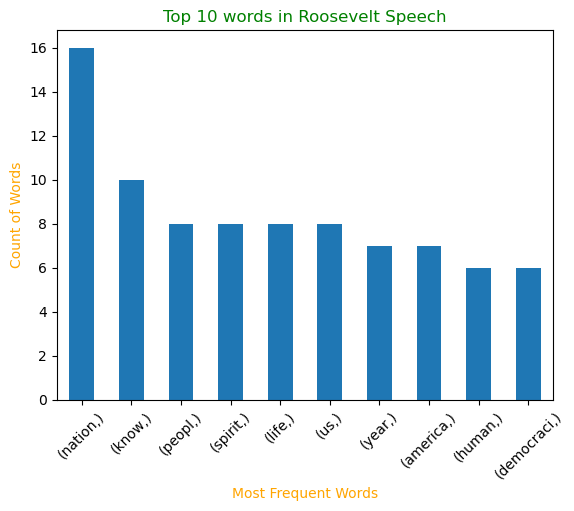

In [26]:
Roosevelt_df.value_counts().head(10).plot.bar()
plt.xticks(rotation=45)
plt.title("Top 10 words in Roosevelt Speech",color='green')
plt.xlabel("Most Frequent Words",color='orange')
plt.ylabel("Count of Words",color='orange')
plt.show()

* Top 3 Words of Roosevelt's Speech are :

      * nation
      * know
      * peopl

**Frequency Distribution of Kennedy Speech**

In [27]:
kenn_words = [i for i in (speech['Speech'][1]).split(" ")]
kenn_words

['vice',
 'presid',
 'johnson',
 'mr',
 'speaker',
 'mr',
 'chief',
 'justic',
 'presid',
 'eisenhow',
 'vice',
 'presid',
 'nixon',
 'presid',
 'truman',
 'reverend',
 'clergi',
 'fellow',
 'citizen',
 'observ',
 'today',
 'victori',
 'parti',
 'celebr',
 'freedom',
 'symbol',
 'end',
 'well',
 'begin',
 'signifi',
 'renew',
 'well',
 'chang',
 'sworn',
 'almighti',
 'god',
 'solemn',
 'oath',
 'forebear',
 'l',
 'prescrib',
 'nearli',
 'centuri',
 'three',
 'quarter',
 'agonnth',
 'world',
 'differ',
 'man',
 'hold',
 'mortal',
 'hand',
 'power',
 'abolish',
 'form',
 'human',
 'poverti',
 'form',
 'human',
 'life',
 'yet',
 'revolutionari',
 'belief',
 'forebear',
 'fought',
 'still',
 'issu',
 'around',
 'globe',
 'belief',
 'right',
 'man',
 'come',
 'generos',
 'state',
 'hand',
 'godnnw',
 'dare',
 'forget',
 'today',
 'heir',
 'first',
 'revolut',
 'let',
 'word',
 'go',
 'forth',
 'time',
 'place',
 'friend',
 'foe',
 'alik',
 'torch',
 'pass',
 'new',
 'gener',
 'american',
 

In [28]:
len(kenn_words)

689

In [29]:
nltk.FreqDist(kenn_words).most_common(15)

[('let', 11),
 ('us', 11),
 ('power', 9),
 ('side', 8),
 ('new', 7),
 ('nation', 7),
 ('pledg', 7),
 ('world', 6),
 ('ask', 6),
 ('citizen', 5),
 ('peac', 5),
 ('shall', 5),
 ('presid', 4),
 ('fellow', 4),
 ('freedom', 4)]

In [30]:
nltk.FreqDist(kenn_words)

FreqDist({'let': 11, 'us': 11, 'power': 9, 'side': 8, 'new': 7, 'nation': 7, 'pledg': 7, 'world': 6, 'ask': 6, 'citizen': 5, ...})

In [31]:
kenn_df=pd.DataFrame(data=kenn_words, columns=['words'])

In [32]:
kenn_df.value_counts().head(10)

words 
us        11
let       11
power      9
side       8
new        7
pledg      7
nation     7
ask        6
world      6
shall      5
dtype: int64

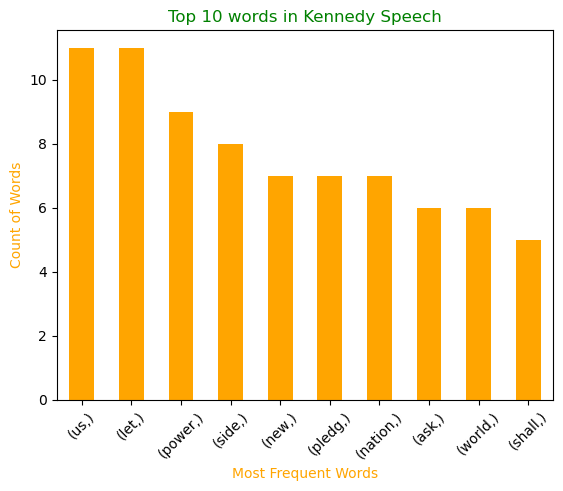

In [33]:
kenn_df.value_counts().head(10).plot.bar(color='orange')
plt.xticks(rotation=45)
plt.title("Top 10 words in Kennedy Speech",color='green')
plt.xlabel("Most Frequent Words",color='orange')
plt.ylabel("Count of Words",color='orange')
plt.show()

* Top 3 words in Kennedy's Speech are:
 
      * us
      * let
      * power

**Frequency Distribution of Noxon Speech**

In [34]:
nixon_words = [i for i in (speech['Speech'][2]).split(" ")]
nixon_words

['mr',
 'vice',
 'presid',
 'mr',
 'speaker',
 'mr',
 'chief',
 'justic',
 'senat',
 'cook',
 'mr',
 'eisenhow',
 'fellow',
 'citizen',
 'great',
 'good',
 'countri',
 'share',
 'togethernnwhen',
 'met',
 'four',
 'year',
 'ago',
 'america',
 'bleak',
 'spirit',
 'depress',
 'prospect',
 'seemingli',
 'endless',
 'war',
 'abroad',
 'destruct',
 'conflict',
 'homenna',
 'meet',
 'today',
 'stand',
 'threshold',
 'new',
 'era',
 'peac',
 'worldnnth',
 'central',
 'question',
 'us',
 'shall',
 'use',
 'peac',
 'let',
 'us',
 'resolv',
 'era',
 'enter',
 'postwar',
 'period',
 'often',
 'time',
 'retreat',
 'isol',
 'lead',
 'stagnat',
 'home',
 'invit',
 'new',
 'danger',
 'abroadnnlet',
 'us',
 'resolv',
 'becom',
 'time',
 'great',
 'respons',
 'greatli',
 'born',
 'renew',
 'spirit',
 'promis',
 'america',
 'enter',
 'third',
 'centuri',
 'nationnnthi',
 'past',
 'year',
 'saw',
 'farreach',
 'result',
 'new',
 'polici',
 'peac',
 'continu',
 'revit',
 'tradit',
 'friendship',
 'missio

In [35]:
len(nixon_words)

819

In [36]:
nltk.FreqDist(nixon_words).most_common(15)

[('us', 26),
 ('america', 19),
 ('respons', 16),
 ('new', 15),
 ('peac', 15),
 ('nation', 14),
 ('let', 13),
 ('world', 12),
 ('great', 9),
 ('govern', 9),
 ('make', 8),
 ('year', 7),
 ('shall', 7),
 ('time', 7),
 ('home', 7)]

In [37]:
nltk.FreqDist(nixon_words)

FreqDist({'us': 26, 'america': 19, 'respons': 16, 'new': 15, 'peac': 15, 'nation': 14, 'let': 13, 'world': 12, 'great': 9, 'govern': 9, ...})

In [38]:
nixon_df = pd.DataFrame(data=nixon_words,columns=['words'])

In [39]:
nixon_df.value_counts().head(10)

words  
us         26
america    19
respons    16
peac       15
new        15
nation     14
let        13
world      12
govern      9
great       9
dtype: int64

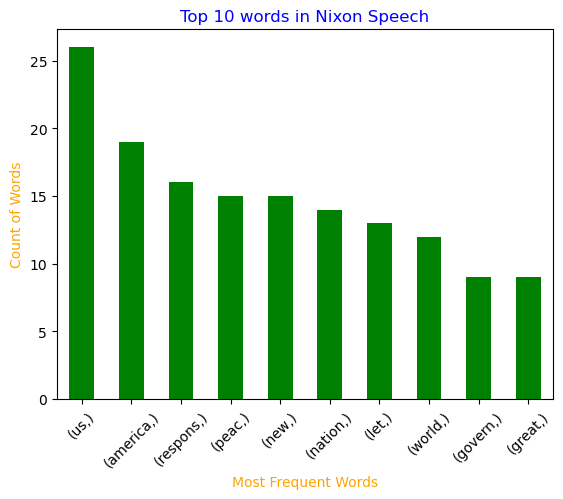

In [40]:
nixon_df.value_counts().head(10).plot.bar(color='green')
plt.xticks(rotation=45)
plt.title("Top 10 words in Nixon Speech",color='blue')
plt.xlabel("Most Frequent Words",color='orange')
plt.ylabel("Count of Words",color='orange')
plt.show()

* Top 3 words in Nixon speech are :
 
     * us
     * america
     * respons

### Frequency Distribution of combined Speeches:

In [41]:
all_words=[i for i in ' '.join(speech['Speech']).split()]
len(all_words)

2132

In [42]:
words=pd.DataFrame(data=all_words, columns=['words'])
words

,words
0,nation
1,day
2,inaugur
3,sinc
4,1789
...,...
2127,us
2128,strive
2129,alway
2130,serv


In [43]:
nltk.FreqDist(all_words).most_common(15)

[('us', 45),
 ('nation', 37),
 ('america', 29),
 ('new', 26),
 ('let', 25),
 ('world', 20),
 ('peac', 20),
 ('respons', 17),
 ('peopl', 16),
 ('year', 16),
 ('govern', 15),
 ('know', 15),
 ('shall', 13),
 ('histori', 12),
 ('human', 12)]

In [44]:
words.value_counts().head(10)

words  
us         45
nation     37
america    29
new        26
let        25
peac       20
world      20
respons    17
peopl      16
year       16
dtype: int64

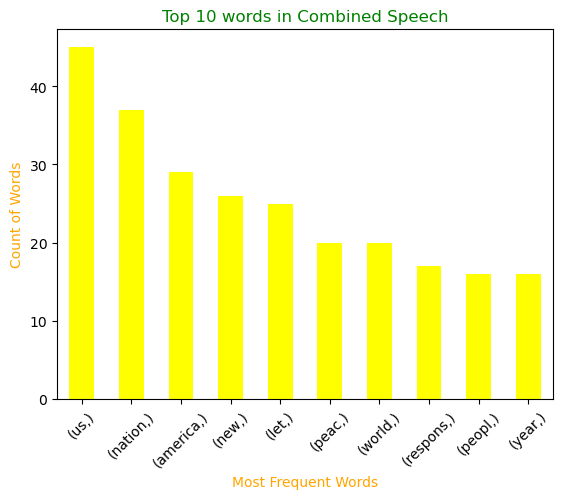

In [45]:
words.value_counts().head(10).plot.bar(color='yellow')
plt.xticks(rotation=45)
plt.title("Top 10 words in Combined Speech",color='green')
plt.xlabel("Most Frequent Words",color='orange')
plt.ylabel("Count of Words",color='orange')
plt.show()

* Top 3 words in Combined speech are :

       * us
       * nation
       * america

## 2.4) Plot the word cloud of each of the three speeches. (after removing the stopwords)

**Creating a WordCloud on Roosevelt Speech**

In [46]:
Roos_speech = speech[speech['Name']=='Roosevelt']

In [47]:
Roos_speech

,Name,Speech,char_count,word_count,word_count_after_removal
0,Roosevelt,nation day inaugur sinc 1789 peopl renew sens ...,7651,1323,624


In [48]:
Roos_corp = Roos_speech['Speech']

In [49]:
Roos_corp

0    nation day inaugur sinc 1789 peopl renew sens ...
Name: Speech, dtype: object

In [50]:
wc_r = ' '.join(Roos_corp)

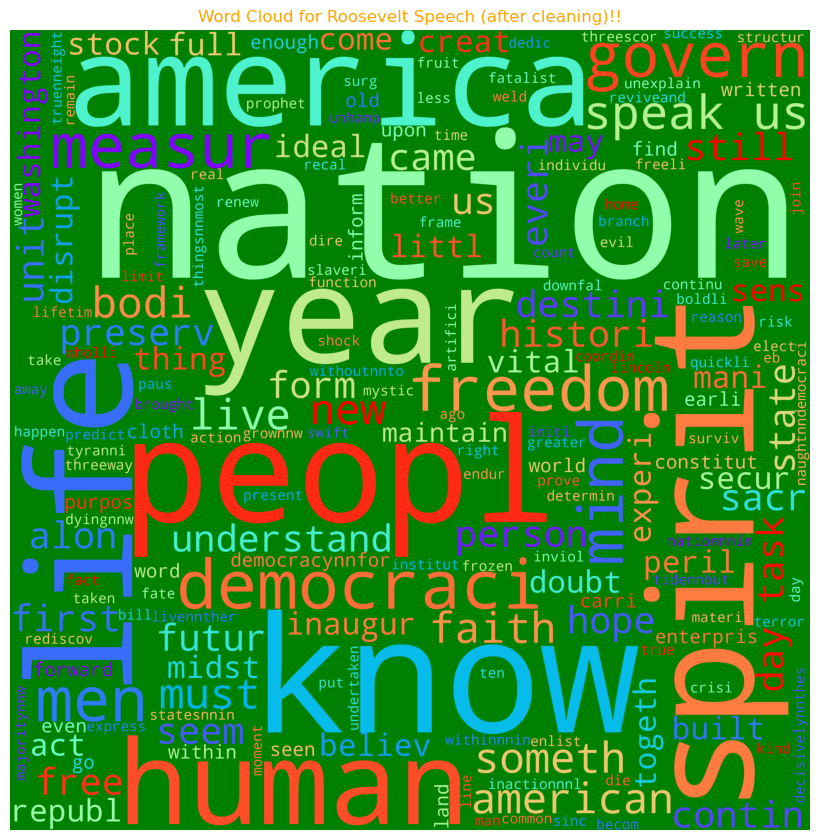

In [51]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='green', colormap ='rainbow',
                min_font_size = 10, random_state=100).generate(wc_r) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

plt.title("Word Cloud for Roosevelt Speech (after cleaning)!!",color='orange')
plt.show()


**Creating a WordCloud on Kennedy Speech**

In [52]:
kennedy_speech = speech[speech['Name']=='Kennedy']
kennedy_speech

,Name,Speech,char_count,word_count,word_count_after_removal
1,Kennedy,vice presid johnson mr speaker mr chief justic...,7673,1364,689


In [53]:
Kennedy_corp = kennedy_speech['Speech']
Kennedy_corp

1    vice presid johnson mr speaker mr chief justic...
Name: Speech, dtype: object

In [54]:
wc_k = ' '.join(Kennedy_corp)


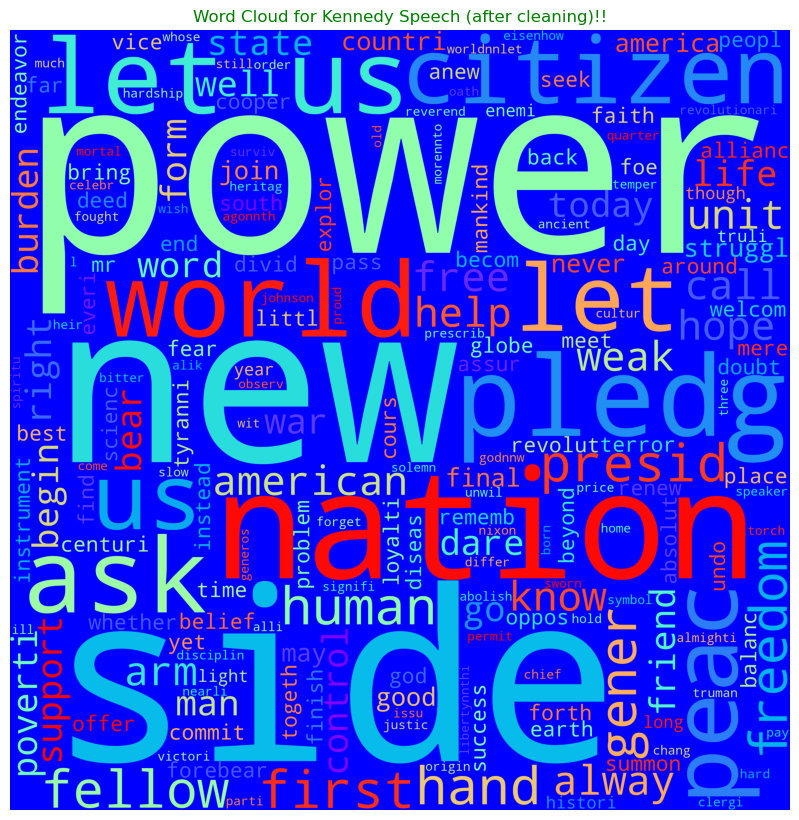

In [55]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='blue', colormap ='rainbow',
                min_font_size = 10, random_state=100).generate(wc_k) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.title("Word Cloud for Kennedy Speech (after cleaning)!!",color='green')
plt.tight_layout(pad = 0) 

# print("Word Cloud for Roosevelt Speech (after cleaning)!!")
plt.show()

**Creating a WordCloud on Nixon Speech**

In [56]:
Nixon_speech = speech[speech['Name']=='Nixon']
Nixon_speech

,Name,Speech,char_count,word_count,word_count_after_removal
2,Nixon,mr vice presid mr speaker mr chief justic sena...,10106,1769,819


In [57]:
Nixon_corp = Nixon_speech['Speech']
Nixon_corp

2    mr vice presid mr speaker mr chief justic sena...
Name: Speech, dtype: object

In [58]:
wc_N = ' '.join(Nixon_corp)

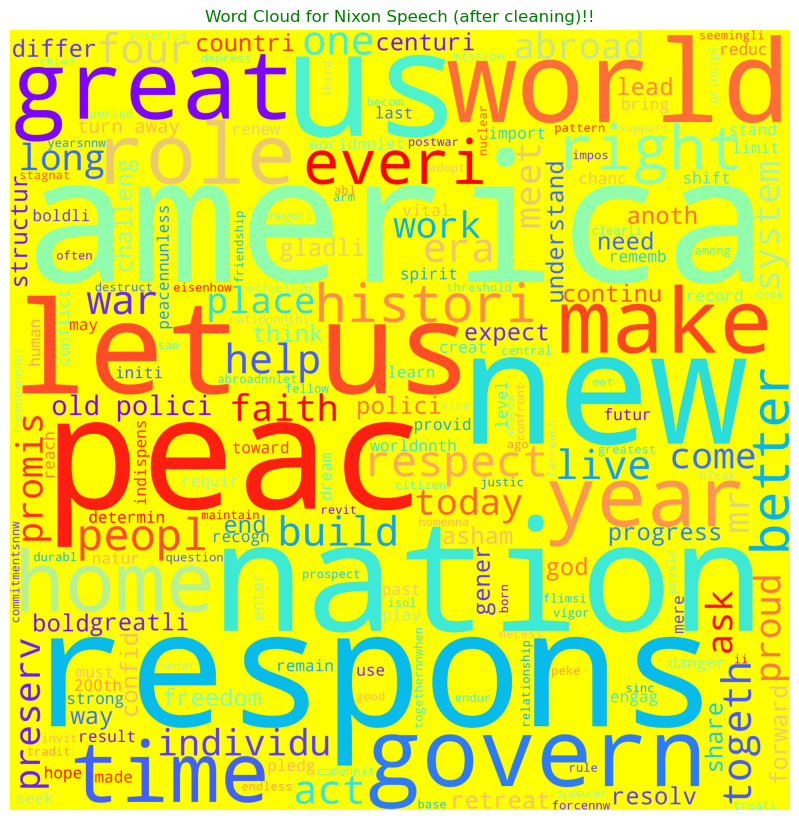

In [59]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='yellow', colormap ='rainbow',
                min_font_size = 10, random_state=100).generate(wc_N) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.title("Word Cloud for Nixon Speech (after cleaning)!!",color='green')
plt.tight_layout(pad = 0) 

# print("Word Cloud for Roosevelt Speech (after cleaning)!!")
plt.show()